# Supermarket Sales

In [1]:
import sys
sys.path.append('..\\utils')

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from MiguelTK import *

In [3]:
df = pd.read_csv('data/supermarket_sales.csv',
                 index_col = 'Invoice ID')
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 750-67-8428 to 849-09-3807
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income

In [5]:
df['datetime'] = pd.to_datetime(
    df['Date'] + ' ' + df['Time']
)

## Contexto

c:\Users\micha\OneDrive\Documentos\GitHub\Miguel_DataAnalytics\Supermarket_Sales\..\utils\MiguelTK.py:30: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(


(320.0, 345.0)

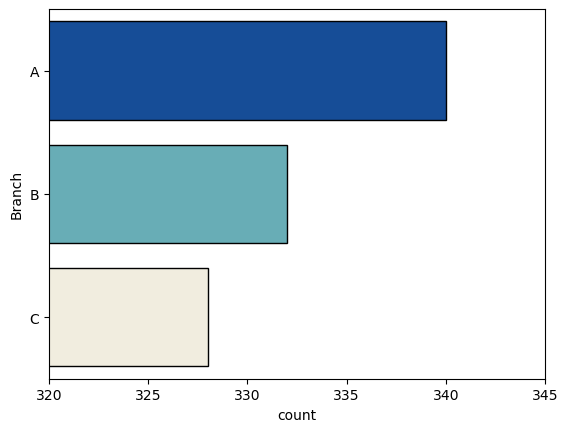

In [6]:
bar_plot('Branch',df)
plt.xlim((320,345))

c:\Users\micha\OneDrive\Documentos\GitHub\Miguel_DataAnalytics\Supermarket_Sales\..\utils\MiguelTK.py:30: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(


(497.0, 505.0)

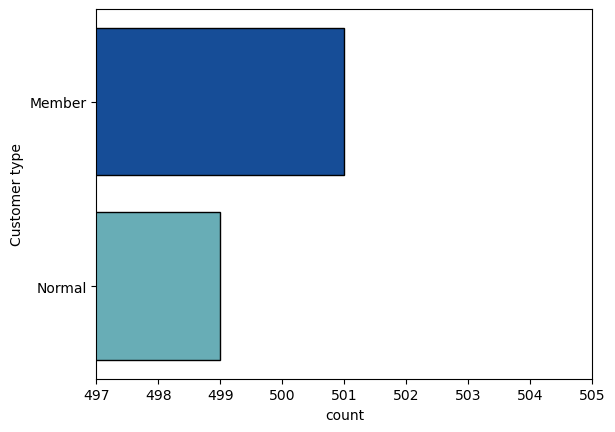

In [16]:
bar_plot('Customer type',df)
plt.xlim((497,505))

c:\Users\micha\OneDrive\Documentos\GitHub\Miguel_DataAnalytics\Supermarket_Sales\..\utils\MiguelTK.py:30: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(


(498.0, 505.0)

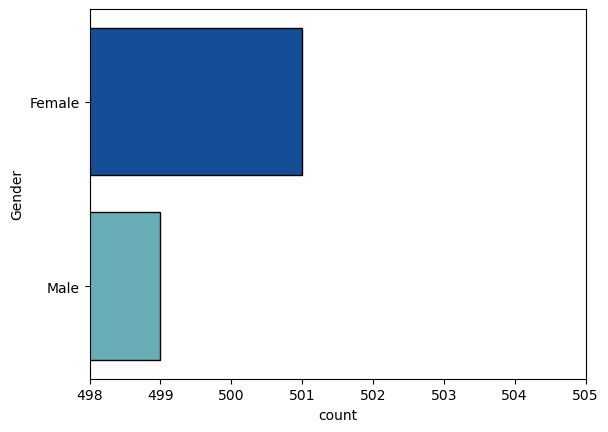

In [18]:
bar_plot('Gender',df)
plt.xlim((498,505))

c:\Users\micha\OneDrive\Documentos\GitHub\Miguel_DataAnalytics\Supermarket_Sales\..\utils\MiguelTK.py:30: UserWarning:


The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.



(125.0, 180.0)

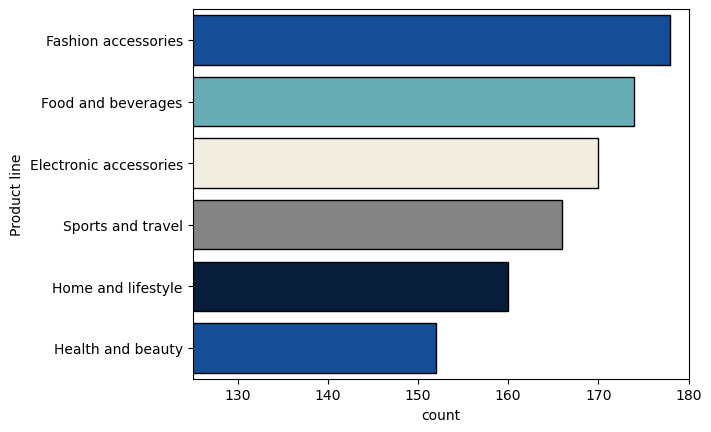

In [34]:
bar_plot('Product line',df)
plt.xlim((125,180))

## Análisis de la serie temporal

In [44]:
df_ = (
    df
    .groupby('Date',as_index=False)
    ['Total']
    .sum()
)
px.line(
    df_,
    x = 'Date',
    y = 'Total'
)

In [66]:
df_ = (
    df
    .groupby('Date',as_index=False)
    ['Total']
    .count()
)
px.line(
    df_,
    x = 'Date',
    y = 'Total'
)

In [49]:
df['hour'] = df['datetime'].dt.hour

In [56]:
df_ = (
    df
    .groupby(['hour','Product line'],as_index=False)
    ['Total']
    .sum()
)
px.line(
    df_,
    x = 'hour',
    y = 'Total',
    color = 'Product line'
)

In [67]:
df_ = (
    df
    .groupby(['hour','Product line'],as_index=False)
    ['Total']
    .count()
)
px.line(
    df_,
    x = 'hour',
    y = 'Total',
    color = 'Product line'
)

In [74]:
df['weekday'] = pd.Categorical(
    df
    .datetime
    .dt
    .day_name('Es_es'),
    ['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo'],
    True
)
df.weekday

Invoice ID
750-67-8428     Sábado
226-31-3081    Viernes
631-41-3108    Domingo
123-19-1176    Domingo
373-73-7910    Viernes
                ...   
233-67-5758     Martes
303-96-2227     Sábado
727-02-1313     Sábado
347-56-2442    Viernes
849-09-3807      Lunes
Name: weekday, Length: 1000, dtype: category
Categories (7, object): ['Lunes' < 'Martes' < 'Miércoles' < 'Jueves' < 'Viernes' < 'Sábado' < 'Domingo']

In [76]:
df_ = (
    df
    .groupby(['weekday','Product line'],as_index=False)
    ['Total']
    .count()
    .sort_values('weekday')
)
px.line(
    df_,
    x = 'weekday',
    y = 'Total',
    color = 'Product line'
)

C:\Users\micha\AppData\Local\Temp\ipykernel_26216\1747489559.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



C:\Users\micha\AppData\Local\Temp\ipykernel_26216\3708556565.py:1: UserWarning:


The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.



<Axes: xlabel='weekday', ylabel='Total'>

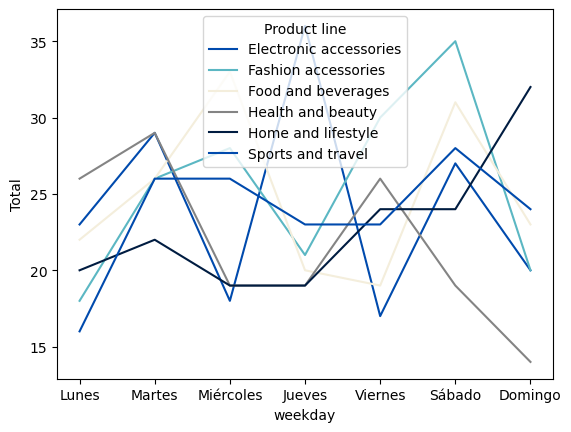

In [80]:
sns.lineplot(
    data = df_,
    x = 'weekday',
    y = 'Total',
    hue = 'Product line',
    palette = palette
)

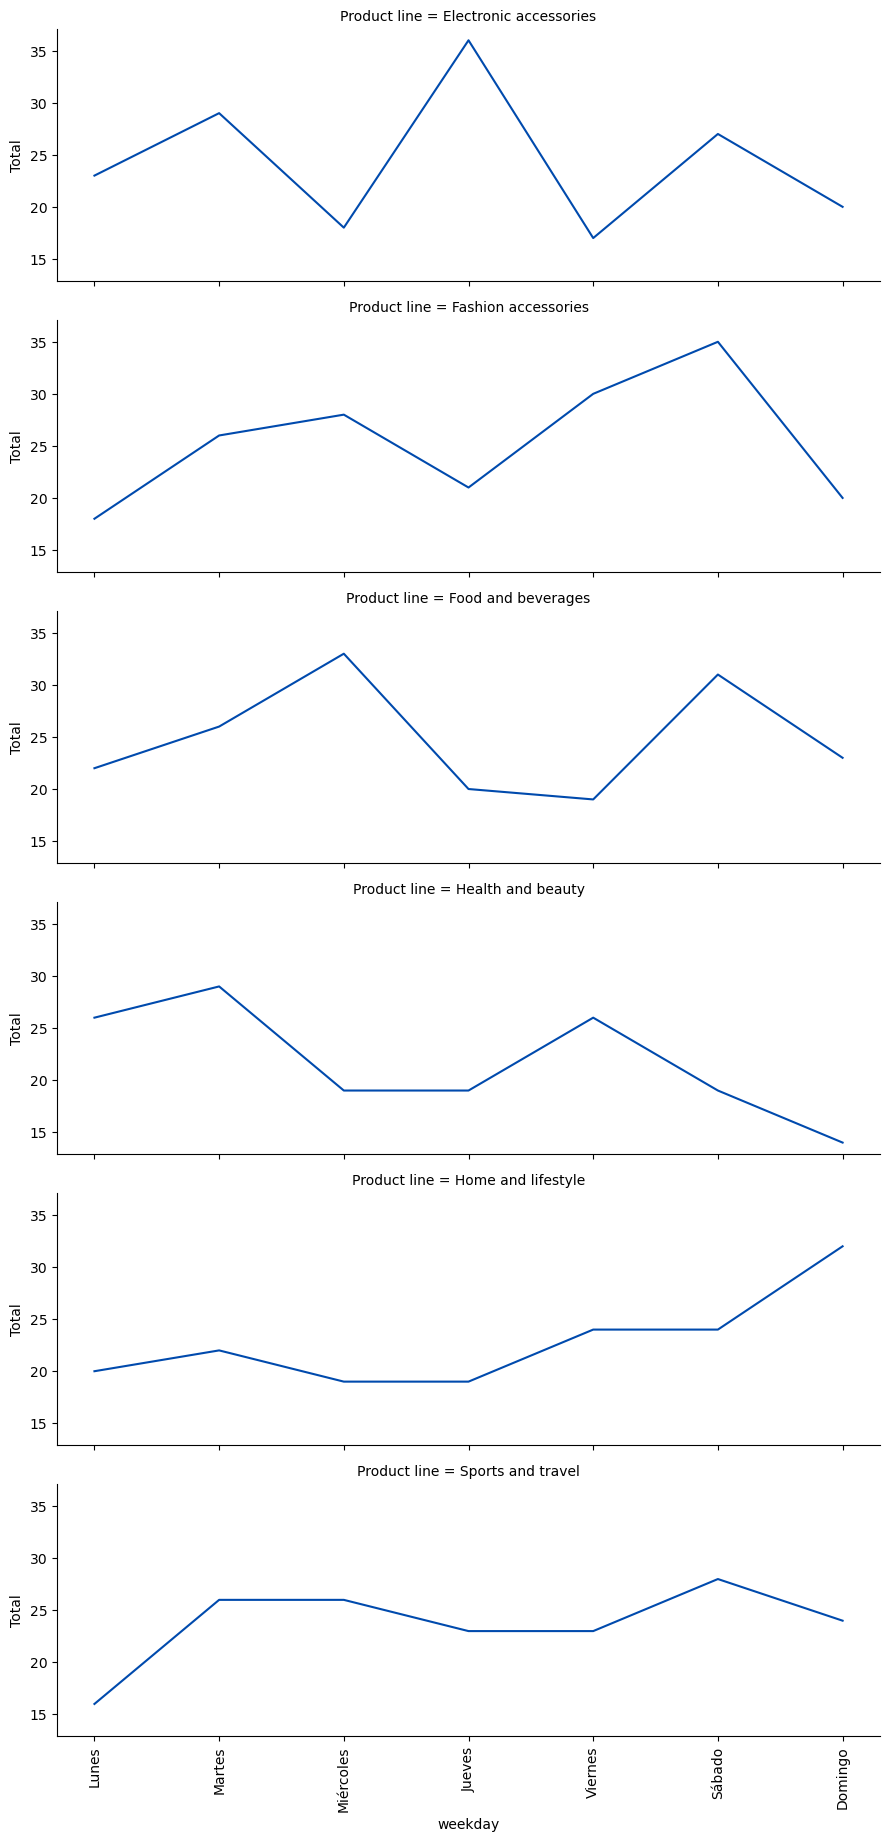

In [99]:
g = sns.FacetGrid(df_,row='Product line',aspect=3)
g.map(
    sns.lineplot,'weekday','Total',color=palette[0]
)
plt.xticks(rotation=90)
plt.show()